In [ ]:
# https://www.kaggle.com/code/shubhamptrivedi/sentiment-analysis-on-imdb-movie-reviews#6.-Tuning-the-Model
# https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/notebook

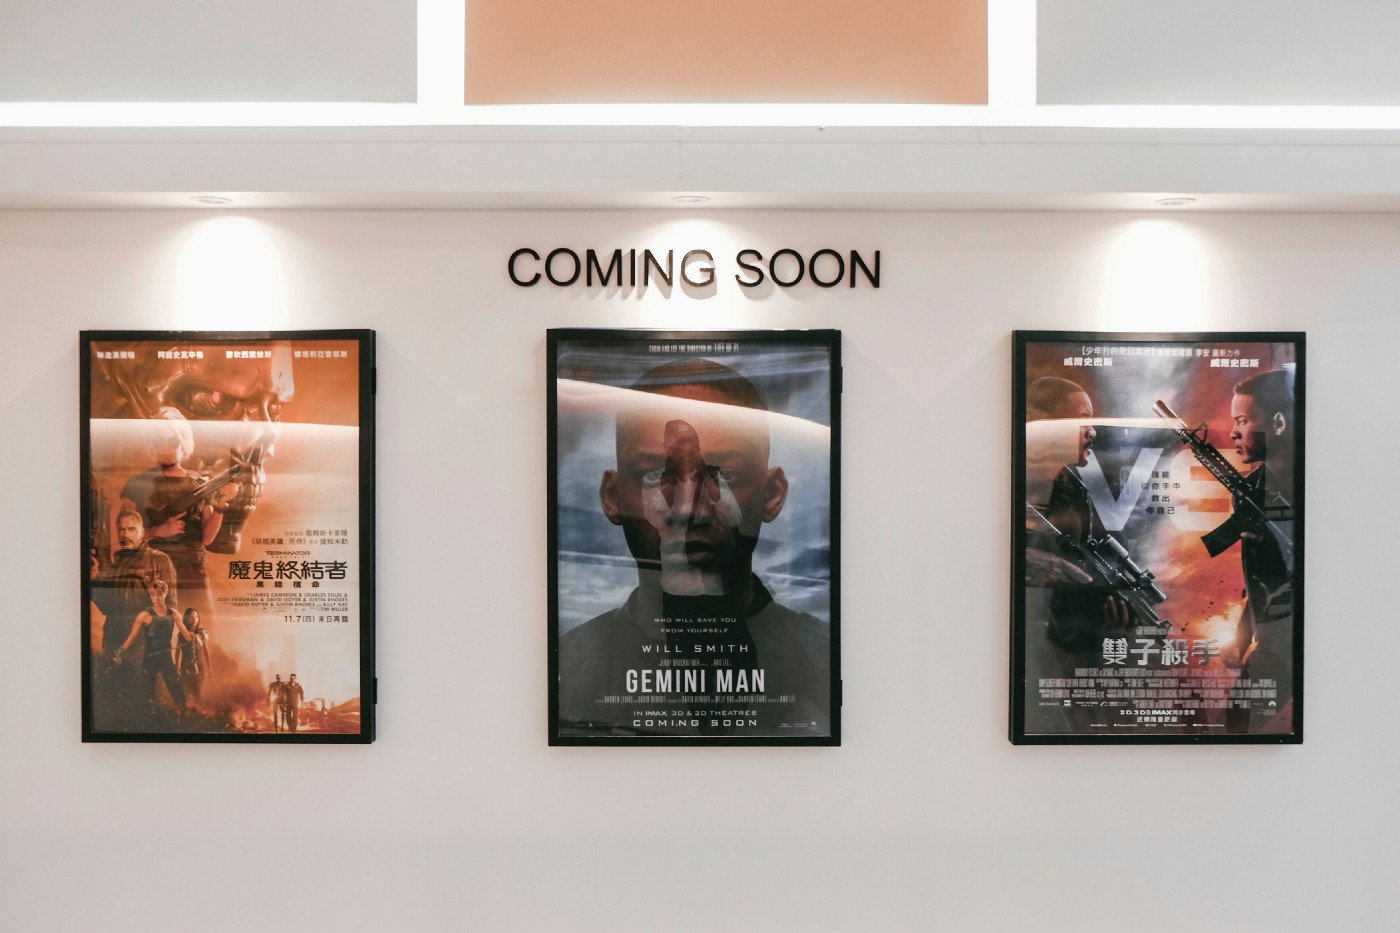

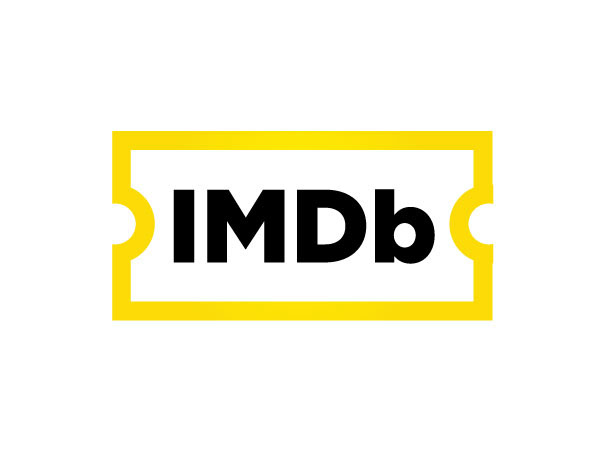

DATASET --> https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/code

# Natural Language Processing (NLP) 
is a sub-field of artificial intelligence that deals understanding and processing human language

## Sentiment analysis
is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.

In this notebbok, we’ll use an IMDB dataset of 50k movie reviews available on Kaggle. The dataset contains 2 columns (review and sentiment) that will help us identify whether a review is positive or negative.

Problem formulation: Our goal is to find which machine learning model is best suited to predict sentiment (output) given a movie review (input).

## The IMDb dataset
is a binary sentiment analysis dataset consisting of 50,000 reviews from the Internet Movie Database (IMDb) labeled as positive or negative No more than 30 reviews are included per movie

In [266]:
import pandas as pd 
df= pd.read_csv('IMDB Dataset.csv')
df.head(10)

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive

## Sentiment Extaction-Analysis EDA

In [267]:
df.shape

(50000, 2)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [269]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

## Update sentiment (sentiment encodeing)
Right now the sentiment column is negative for negative, positive for positive. Let's change that to 0 and 1 to make things a little more reasonably readable.

In [270]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sentiment']= le.fit_transform(df['sentiment'])

In [271]:
df.head() #1 --> positive # 0 --> negative

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

C:\Users\nabee\anaconda3\envs\TensorFlow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

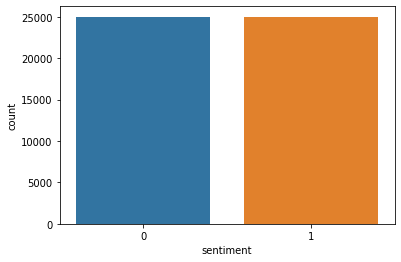

In [272]:
import seaborn as sns
sns.countplot(df.sentiment)

## We can see that the dataset is balanced.
A balanced dataset is a dataset where each output class (or target class) is represented by the same number of input samples

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations

 # preprocessing and cleaning the text data

## What are Stop words?
Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore,we remove the low-level information from our text in order to give more focus to the important information

Movie review: “The movie was not good at all.”

Text after removal of stop words: “movie good”

We can clearly see that the review for the movie was negative. However, after the removal of stop words, the review became positive, which is not the reality. Thus, the removal of stop words can be problematic here.

so we will keep the not : "movie not good"

In [273]:
import nltk
nltk.download('stopwords')
  
import nltk
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
# we need to keep the word not in a sentence to know when a statement is being negated.
all_stopwords.remove('not')
all_stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nabee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [274]:
# Let  check how many stop words this library has.
print(len(all_stopwords))

178


appling lambda function row by row on the data ( review)

In [275]:
df['review'] = df['review'].apply(lambda x :" ".join([word for word in x.split() if word not in all_stopwords]))

## lower case conversion

In [276]:
df['review'] = df['review'].apply(lambda x :str(x).lower())

## contraction to expansion
Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe.

on reviews of a product as the words play an important role in sentiment analysis.

In [277]:

contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "can not",
"can't've": "can not have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "i had / I would",
"i'd've": "i would have",
"i'll": "i shall / I will",
"i'll've": "i shall have / i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [278]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions :
            value = contractions[key]
            x=x.replace(key,value)
        return x
    else:
        return x

In [279]:
df['review'] = df['review'].apply(lambda x: cont_to_exp(x))

### remove emials

In [280]:
import re
df['review'] = df['review'].apply(lambda x:re.sub(r'([a-zA-Z0-9._-]+@[a-zA -Z0-9._-]+\.[a-zA-Z0-9._-]+)','',x))

### remove html

In [281]:
def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)

df['review'] = df['review'].apply(lambda x: remove_html(x))

### remove URL

In [282]:
df['review'] = df['review'].apply(lambda x : re.sub(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))","",x))

In [283]:
df.head(10)

review  sentiment
0  one reviewers mentioned watching 1 oz episode ...          1
1  a wonderful little production. the filming tec...          1
2  i thought wonderful way spend time hot summer ...          1
3  basically there has / there is family little b...          0
4  petter mattei's "love time money" visually stu...          1
5  probably all-time favorite movie, story selfle...          1
6  i sure would like see resurrection dated seahu...          1
7  this show amazing, fresh & innovative idea 70'...          0
8  encouraged positive comments film i looking fo...          0
9  if like original gut wrenching laughter like m...          1

### remove multiple spaces `"the      movie  was  really good"`

In [284]:
df['review'] = df['review'].apply(lambda x :" ".join(x.split()))

### remove special chars  and punctuation 

In [285]:
df['review'] = df['review'].apply(lambda x : re.sub('[^A-Z a-z ]+','',x))

In [286]:
df.head(10)

review  sentiment
0  one reviewers mentioned watching  oz episode h...          1
1  a wonderful little production the filming tech...          1
2  i thought wonderful way spend time hot summer ...          1
3  basically there has  there is family little bo...          0
4  petter matteis love time money visually stunni...          1
5  probably alltime favorite movie story selfless...          1
6  i sure would like see resurrection dated seahu...          1
7  this show amazing fresh  innovative idea s fir...          0
8  encouraged positive comments film i looking fo...          0
9  if like original gut wrenching laughter like m...          1

## data visualization --> Word Cloud
Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

In [31]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

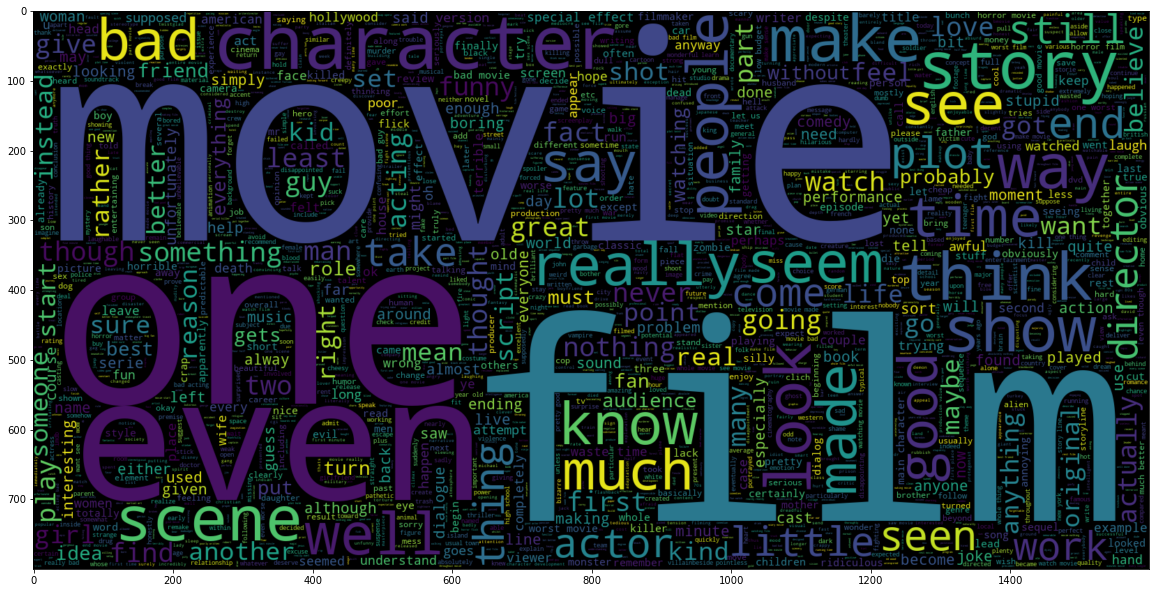

In [24]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 0].review))
plt.imshow(wc , interpolation = 'bilinear')

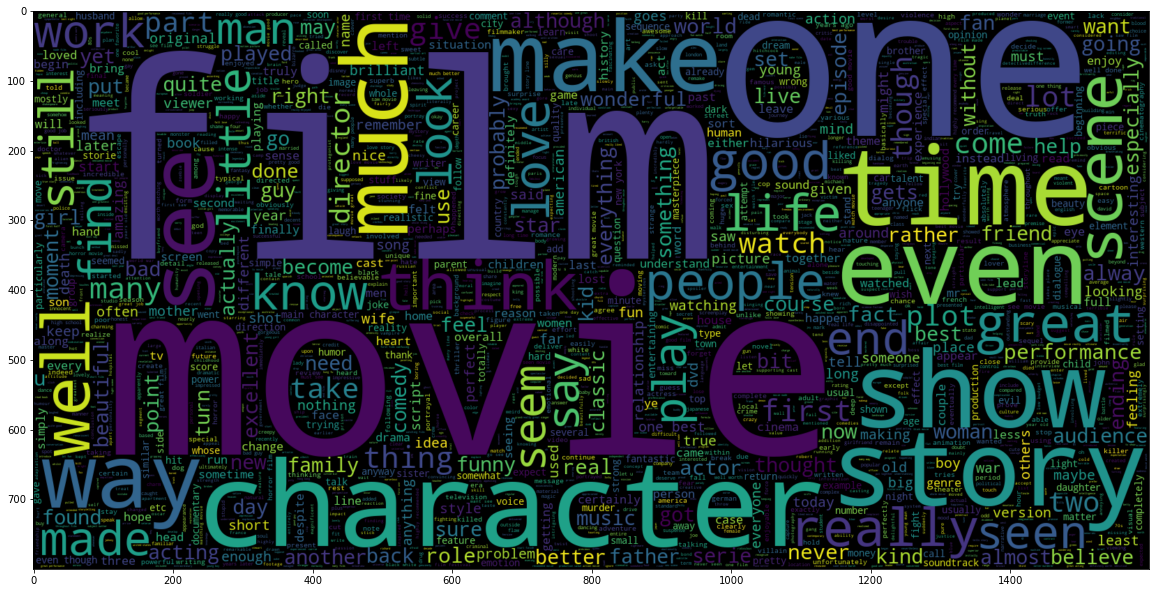

In [25]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 1].review))
plt.imshow(wc , interpolation = 'bilinear')

### freqent  words 

In [261]:
text = ' '.join(df['review'])
text = text.split()
freq_comm = pd.Series(text).value_counts()
top_20=freq_comm[:20] #top 20 freqent commen words 
top_20

i         155889
movie      83572
the        82110
film       74508
not        73357
it         67669
one        50388
is         43148
like       38829
has        36259
this       31770
good       28500
would      28167
even       24279
time       23299
he         23114
there      22967
really     22898
see        22435
that       22263
dtype: int64

### rare words

In [64]:
rare20=freq_comm[-20:]
rare20

unoriginalworst       1
bako                  1
corrode               1
gotland               1
shamein               1
tautif                1
moronsthe             1
snacksin              1
hikein                1
leadup                1
grossfactor           1
creepedout            1
aaaaagh               1
harristhen            1
pols                  1
politicsespecially    1
holesi                1
verrrrry              1
peacesthis            1
yosemitei             1
dtype: int64

In [65]:
rare=freq_comm[freq_comm.values==1]
rare

friendsneighbors      1
sororitystyle         1
etremely              1
pansexual             1
pooling               1
                     ..
politicsespecially    1
holesi                1
verrrrry              1
peacesthis            1
yosemitei             1
Length: 131474, dtype: int64

## Tokenization 
The first part of making sense of the data is through a process called tokenization, or splitting strings into smaller parts called tokens.

It is a particular kind of document segmentation. It does breaks up text into smaller chunks or segments called tokens. A tokenizer breaks unstructured data, natural language text, into chunks of information that can be counted as discrete elements. After this operation these counts of token occurences in particular document can be used as a vector representing given document.

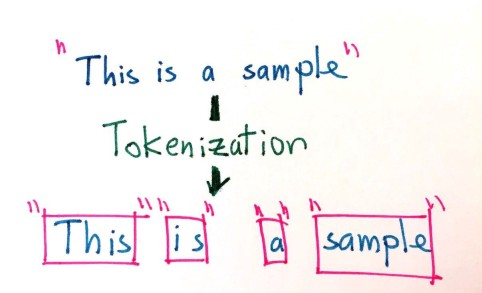

In [210]:
df.head(10)

review  sentiment
0  one reviewers mentioned watching  oz episode h...          1
1  a wonderful little production the filming tech...          1
2  i thought wonderful way spend time hot summer ...          1
3  basically there has  there is family little bo...          0
4  petter matteis love time money visually stunni...          1
5  probably alltime favorite movie story selfless...          1
6  i sure would like see resurrection dated seahu...          1
7  this show amazing fresh  innovative idea s fir...          0
8  encouraged positive comments film i looking fo...          0
9  if like original gut wrenching laughter like m...          1

In [211]:
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['review'] = df['review'].apply(tokenizer.tokenize)

In [212]:
df['review']

0        [one, reviewers, mentioned, watching, oz, epis...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, wonderful, way, spend, time, hot,...
3        [basically, there, has, there, is, family, lit...
4        [petter, matteis, love, time, money, visually,...
                               ...                        
49995    [i, thought, movie, right, good, job, it, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, catholic, taught, parochial, elementary, s...
49998    [i, am, going, disagree, previous, comment, si...
49999    [no, one, expects, star, trek, movies, high, a...
Name: review, Length: 50000, dtype: object

## Normalizing Words
For grammatical reasons, documents are going to use different forms of a word, such as write, writing and writes. Additionally, there are families of derivationally related words with similar meanings. The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

convert to the base form --> is required becouse vocabulary library will be vary large
Cnovert into base or root from of word

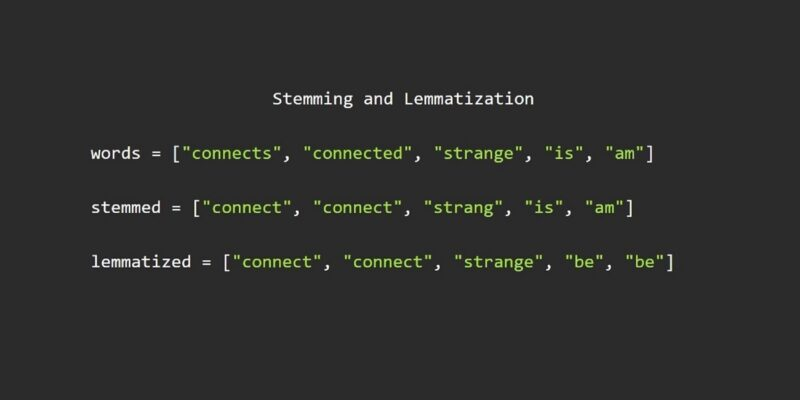

## Applying Lemmatizer


In [238]:
import nltk
nltk.download('omw-1.4')
  

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

df['review'] = df['review'].apply(lambda x: lemmatizer_on_text(x))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nabee\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Separating text and label

In [239]:
X=df.review
y=df.sentiment

In [240]:
X

0        one reviewers mentioned watching  oz episode h...
1        a wonderful little production the filming tech...
2        i thought wonderful way spend time hot summer ...
3        basically there has  there is family little bo...
4        petter matteis love time money visually stunni...
                               ...                        
49995    i thought movie right good job it creative ori...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i catholic taught parochial elementary schools...
49998    i am going disagree previous comment side malt...
49999    no one expects star trek movies high art fans ...
Name: review, Length: 50000, dtype: object

In [241]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int32

Machine learning algorithms cannot work with raw text directly. Rather, the text must be converted into vectors of numbers


## Preparing the text for training

## Term Frequency-Inverse Document Frequency model (TFIDF)

 It is one of the most important techniques used for information retrieval to represent how important a specific word or phrase is to a given document
 
 The idea is to assign particular weights to words that tell us about how important they are in the document.

term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence

TF-IDF use two statistical methods, first is Term Frequency and the other is Inverse Document Frequency. Term frequency refers to the total number of times a given term t appears in the document doc against (per) the total number of all words in the document and The inverse document frequency measure of how much information the word provides. It measures the weight of a given word in the entire document. IDF show how common or rare a given word is across all documents.
TF-IDF can be computed as tf * idf

is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling
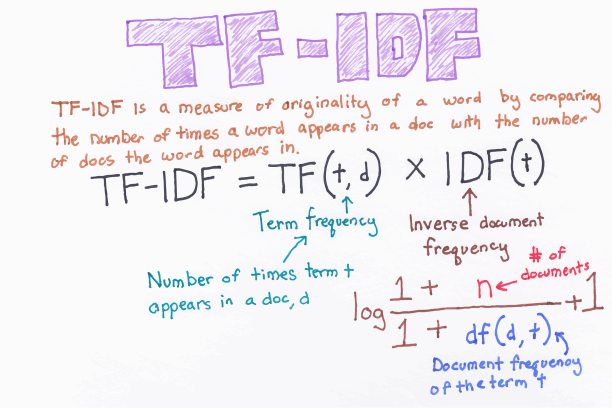

In [242]:
from sklearn.feature_extraction.text import TfidfVectorizer
# it take the term frequency of our trem T in our documnet D and multiple
# it by inverse documnet frequncy of that term T in all our documnets
vectorizer = TfidfVectorizer(min_df=2,max_df=0.5,ngram_range=(1,2))
XX=vectorizer.fit_transform(X)

In [243]:
XX.shape

(50000, 701524)

In [246]:
pd.DataFrame.sparse.from_spmatrix(XX,
                                  columns=vectorizer.get_feature_names())

C:\Users\nabee\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aa  aa group  aa meetings  aaa  aaa level  aaaand  aaah  aaargh  \
0      0.0       0.0          0.0  0.0        0.0     0.0   0.0     0.0   
1      0.0       0.0          0.0  0.0        0.0     0.0   0.0     0.0   
2      0.0       0.0          0.0  0.0        0.0     0.0   0.0     0.0   
3      0.0       0.0          0.0  0.0        0.0     0.0   0.0     0.0   
4      0.0       0.0          0.0  0.0        0.0     0.0   0.0     0.0   
...    ...       ...          ...  ...        ...     ...   ...     ...   
49995  0.0       0.0          0.0  0.0        0.0     0.0   0.0     0.0   
49996  0.0       0.0          0.0  0.0        0.0     0.0   0.0     0.0   
49997  0.0       0.0          0.0  0.0        0.0     0.0   0.0     0.0   
49998  0.0       0.0          0.0  0.0        0.0     0.0   0.0     0.0   
49999  0.0       0.0          0.0  0.0        0.0     0.0   0.0     0.0   

       aachen  aag  ...  zwart  zwarts  zweite  zwick  zwick he   zy   zz  \
0         0.0  0.0  ...    0.0     0.0     0.0    0.0       0.0  0.0  0.0   
1         0.0  0.0  ...    0.0     0.0     0.0    0.0       0.0  0.0  0.0   
2         0.0  0.0  ...    0.0     0.0     0.0    0.0       0.0  0.0  0.0   
3         0.0  0.0  ...    0.0     0.0     0.0    0.0       0.0  0.0  0.0   
4         0.0  0.0  ...    0.0     0.0     0.0    0.0       0.0  0.0  0.0   
...       ...  ...  ...    ...     ...     ...    ...       ...  ...  ...   
49995     0.0  0.0  ...    0.0     0.0     0.0    0.0       0.0  0.0  0.0   
49996     0.0  0.0  ...    0.0     0.0     0.0    0.0       0.0  0.0  0.0   
49997     0.0  0.0  ...    0.0     0.0     0.0    0.0       0.0  0.0  0.0   
49998     0.0  0.0  ...    0.0     0.0     0.0    0.0       0.0  0.0  0.0   
49999     0.0  0.0  ...    0.0     0.0     0.0    0.0       0.0  0.0  0.0   

       zz top  zzvorkov  zzzz  
0         0.0       0.0   0.0  
1         0.0       0.0   0.0  
2         0.0       0.0   0.0  
3         0.0       0.0   0.0  
4         0.0       0.0   0.0  
...       ...       ...   ...  
49995     0.0       0.0   0.0  
49996     0.0       0.0   0.0  
49997     0.0       0.0   0.0  
49998     0.0       0.0   0.0  
49999     0.0       0.0   0.0  

[50000 rows x 701524 columns]

## splitting the data
As we prepared all the review, now we are separating/splitting the reviews into training data and testing data.
80% tweets will be used in the training 20% tweets will be used to test the performance of the model.

## Training Data
We use training data when we train the models. We feed train data to machine learning and deep learning models so that model can learn from the data.

## Testing Data
We use testing data after training the model. We use this data to evalaute the performance that how the model perform after training. So in this way first we get predictions from the trained model without giving the labels and then we compare the true labels with predictions and get the performance of th model..

In [149]:
#Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(XX, y,test_size=0.2, random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape, y_test.shape)

(40000, 701524) (40000,)
(10000, 701524) (10000,)


In [151]:
print(x_train.shape,y_train.shape)
print(x_test.shape, y_test.shape)

(40000, 701524) (40000,)
(10000, 701524) (10000,)


# Implementing the models
In our example, our input (review) and output (sentiment) are clearly identified, so we can say we have labeled input and output data; therefore, we’re dealing with supervised learning.

# Support vector machines (SVMs)
SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data are transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.
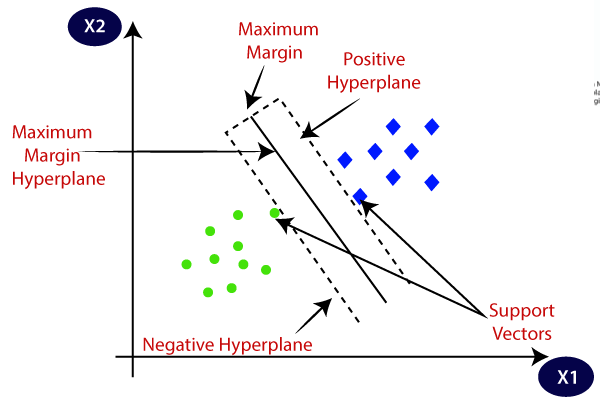

In [152]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [153]:
y_pred =SVCmodel.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [154]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
report=classification_report(y_test, y_pred)
print("Support Vector classifier (linear kernal) report \n",report)

Support Vector classifier (linear kernal) report 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      4961
           1       0.90      0.92      0.91      5039

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [155]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9095


Text(0.5, 15.0, 'Predicted label')

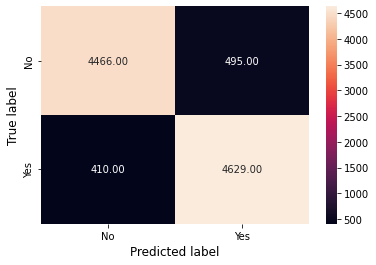

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

In [157]:
print(SVCmodel.predict(vectorizer.transform(['A good movie'])))
print(SVCmodel.predict(vectorizer.transform(['An excellent movie'])))
print(SVCmodel.predict(vectorizer.transform(['I did not like this movie at all I gave this movie away'])))

[1]
[1]
[0]


# Decision Tree
A decision tree is a graphical representation of all possible solutions to a decision based on certain conditions.
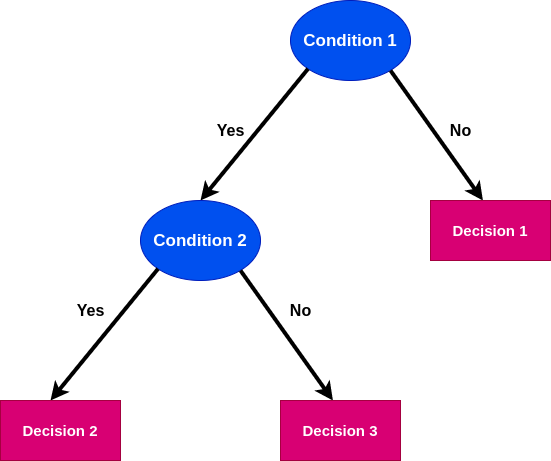

In [158]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [159]:
print(y_train.shape)
y_train

(40000, 1)


array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [160]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [161]:
y_pred =dec_tree.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 0, 1])

Text(0.5, 15.0, 'Predicted label')

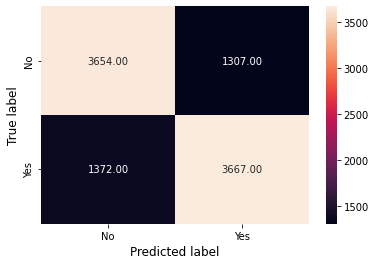

In [162]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

In [163]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7321


# Logistic Regression
Sigmoid Function:
The sigmoid function is useful to map any predicted values of probabilities into another value between 0 and 1.
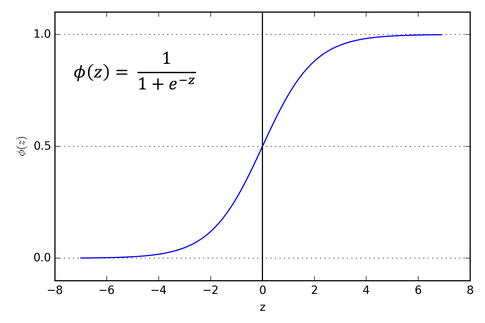

In [165]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

C:\Users\nabee\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [166]:
y_pred =dec_tree.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 0, 1])

Text(0.5, 15.0, 'Predicted label')

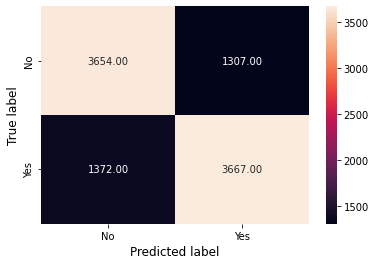

In [167]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

In [168]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7321


## Naive Bayes model

Naive Bayes are mostly used in natural language processing (NLP) problems. Naive Bayes predict the tag of a text. They calculate the probability of each tag for a given text and then output the tag with the highest one. 
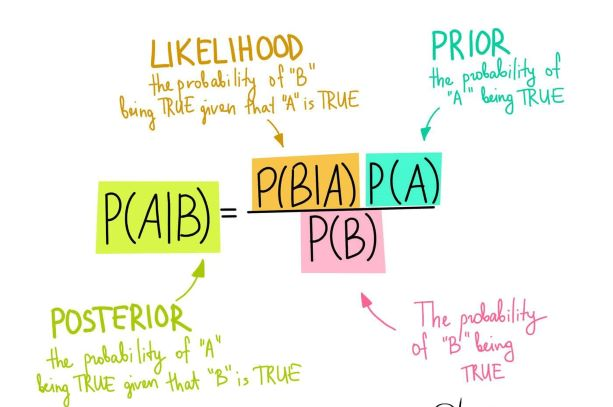

In [250]:
# Create a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train, y_train)

C:\Users\nabee\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [251]:
y_pred =nb.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

Text(0.5, 15.0, 'Predicted label')

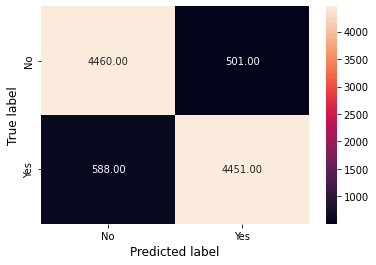

In [288]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

In [253]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8911


## Recurrent Neural Networks RNN
Recurrent neural network is a type of neural network used to deal specifically with sequential data. Actually what makes RNN so powerful is the fact that it doesn’t take into consideration just the actual input but also the previous input which allows it to memorize what happens previously.

## LSTM (Long Short Term Memory)

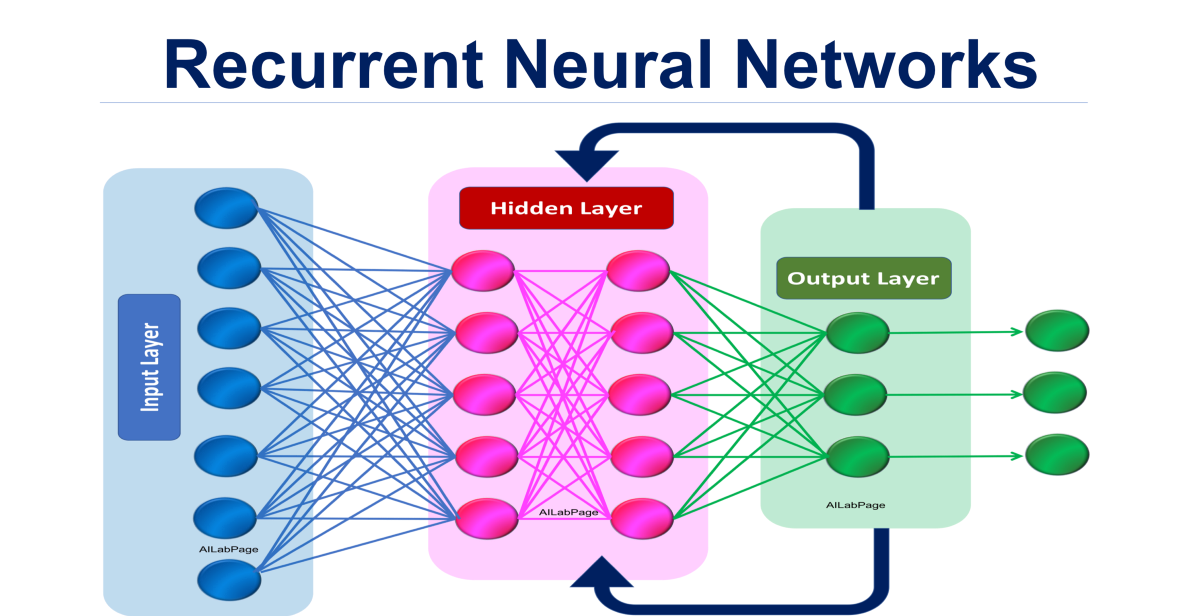

In [249]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.layers.embeddings import Embedding
# from keras.preprocessing import sequence